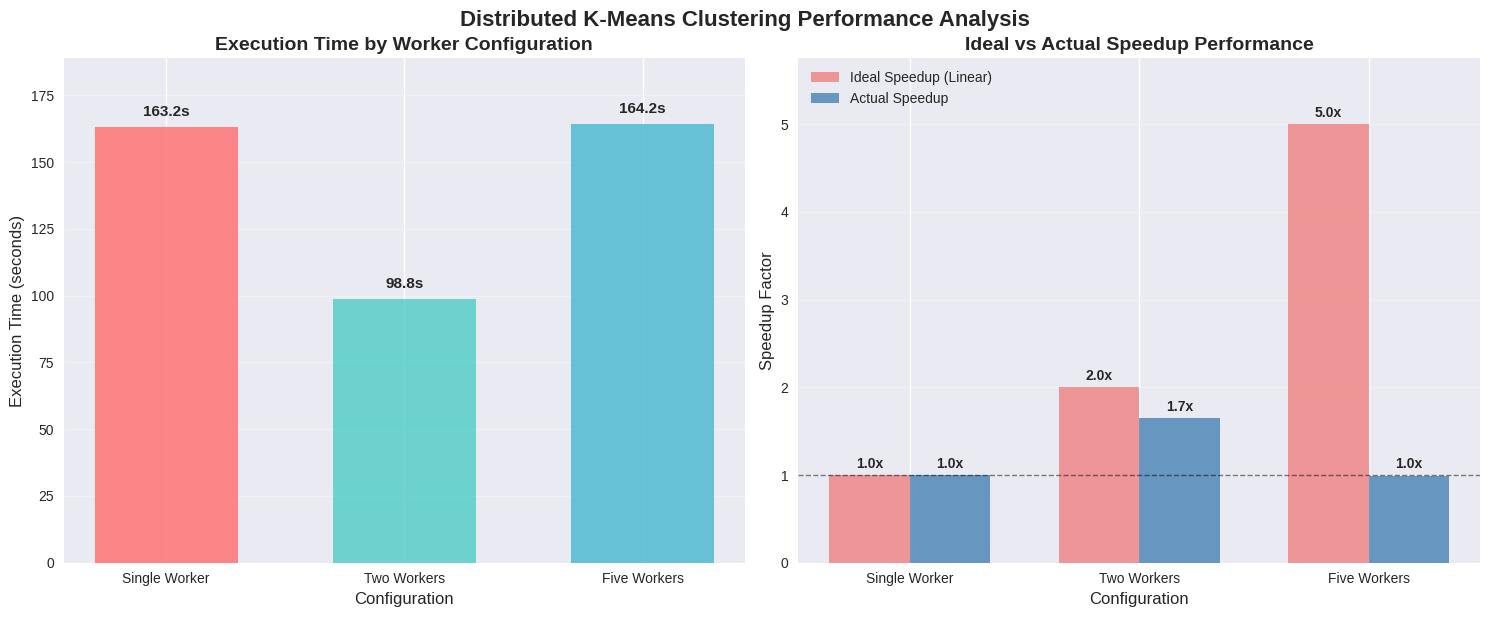

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

performance_data = {
    'Configuration': ['Single Worker', 'Two Workers', 'Five Workers'],
    'Workers': [1, 2, 5],
    'Total Cores': [11, 22, 55],
    'Total Memory (GiB)': [6.7, 13.3, 33.3],
    'Execution Time (s)': [163.18, 98.84, 164.22],
    'Improvement (%)': [0, 39.6, -0.6]
}

df = pd.DataFrame(performance_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

bars1 = ax1.bar(df['Configuration'], df['Execution Time (s)'],
                color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8, width=0.6)
ax1.set_title('Execution Time by Worker Configuration', fontsize=14, fontweight='bold')
ax1.set_ylabel('Execution Time (seconds)', fontsize=12)
ax1.set_xlabel('Configuration', fontsize=12)
ax1.tick_params(axis='x', rotation=0)

for bar, value in zip(bars1, df['Execution Time (s)']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3,
             f'{value:.1f}s', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, max(df['Execution Time (s)']) * 1.15)

ideal_speedup = df['Total Cores'] / df['Total Cores'].iloc[0]
actual_speedup = df['Execution Time (s)'].iloc[0] / df['Execution Time (s)']

x = np.arange(len(df))
width = 0.35

bars2 = ax2.bar(x - width/2, ideal_speedup, width, label='Ideal Speedup (Linear)',
                color='lightcoral', alpha=0.8)
bars3 = ax2.bar(x + width/2, actual_speedup, width, label='Actual Speedup',
                color='steelblue', alpha=0.8)

ax2.set_title('Ideal vs Actual Speedup Performance', fontsize=14, fontweight='bold')
ax2.set_ylabel('Speedup Factor', fontsize=12)
ax2.set_xlabel('Configuration', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Configuration'], rotation=0)
ax2.legend(fontsize=10)


for bars in [bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.05,
                f'{height:.1f}x', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5, linewidth=1)
ax2.set_ylim(0, max(max(ideal_speedup), max(actual_speedup)) * 1.15)

plt.tight_layout()

fig.suptitle('Distributed K-Means Clustering Performance Analysis',
             fontsize=16, fontweight='bold', y=1.02)

plt.show()